In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pygimli as pg
from pygimli.physics import ert

In [2]:
data = ert.load('datos_tre/ejercicio_convertido.dat')

In [8]:
print(data)

Data: Sensors: 24 data: 186, nonzero entries: ['a', 'b', 'err', 'k', 'm', 'n', 'rhoa', 'valid']


In [3]:
data["k"]=ert.geometricFactors(data)

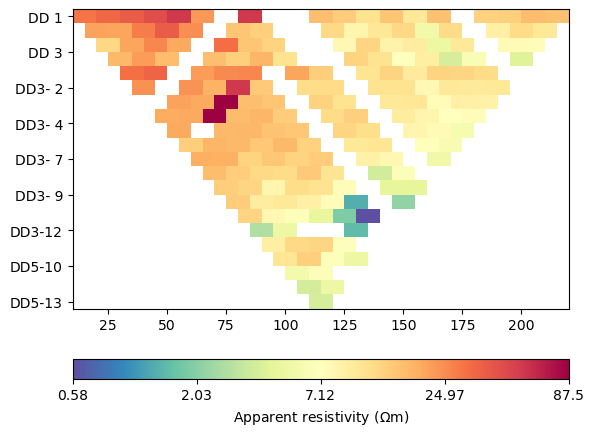

In [4]:
ax, cb = ert.show(data)

In [5]:
data["err"]=ert.estimateError(data)

In [6]:
mgr = ert.ERTManager(data)

In [7]:
inv = mgr.invert(verbose=True)

12/02/24 - 19:34:08 - pyGIMLi - INFO - Found 2 regions.
12/02/24 - 19:34:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/02/24 - 19:34:08 - pyGIMLi - INFO - Found 2 regions.
12/02/24 - 19:34:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/02/24 - 19:34:08 - pyGIMLi - INFO - Creating forward mesh from region infos.
12/02/24 - 19:34:09 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
12/02/24 - 19:34:09 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1197 Cells: 2232 Boundaries: 1754
12/02/24 - 19:34:09 - pyGIMLi - INFO - Use median(data values)=12.555
12/02/24 - 19:34:09 - pyGIMLi - INFO - Created startmodel from forward operator: 361, min/max=12.555000/12.555000
12/02/24 - 19:34:09 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001EB70CA3AE0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001EB70CA3310>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001EB70CA36D0>
min/max (data): 0.58/87.5
min/max (error): 3%/3.17%
min/max (start model): 12.55/12.55
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  497.76
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  149.75 (dPhi = 67.71%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  113.39 (dPhi = 25.86%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   89.21 (dPhi = 17.38%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   89.07 (dPhi = 0.79%) lam: 20.0
############

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np

<Axes: ylabel='Count'>

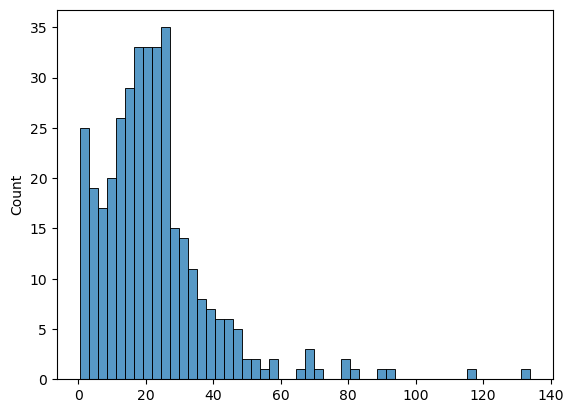

In [11]:
sns.histplot(inv, bins = 50)

(-60.0, 0.0)

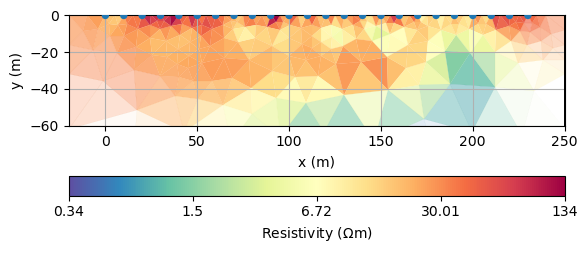

In [14]:
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0) #cMin y cMax son los valores mínimos y máximos de la barra de colores
ax, cb = mgr.showResult(**kw)
ax.grid(True)
ax.set_ylim([-60, ax.get_ylim()[1]]) #esto es para que el eje 'y' empiece en -250